# PCA

## 1. sklearn

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris() # dict('data', 'target')
pca = PCA(n_components=4)
Y = pca.fit_transform(iris['data'])
X = iris['data']

In [6]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

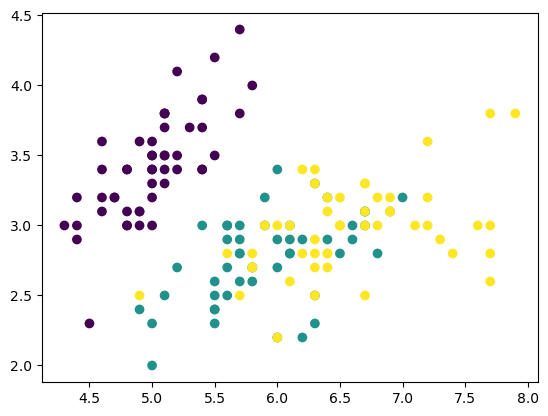

In [8]:
plt.scatter(X[:,0], X[:,1], c = iris['target'] )
plt.show() # 겹치는 걸 확인할 수 있음.

In [5]:
Y[0] # 0번째 datapoint의 주성분 피쳐값

array([-2.68412563e+00,  3.19397247e-01, -2.79148276e-02, -2.26243707e-03])

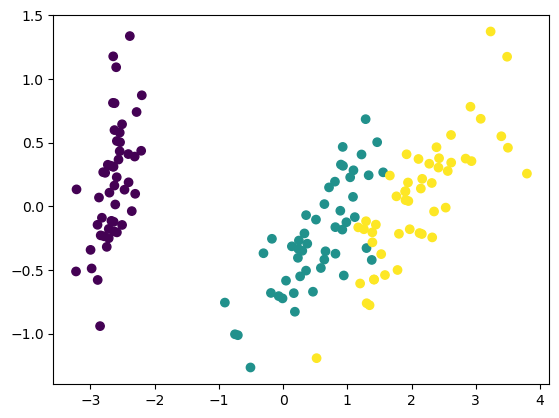

In [7]:
plt.scatter(Y[:,0], Y[:,1], c=iris['target'])
plt.show()

In [24]:
print(pca.explained_variance_)

[4.22824171 0.24267075 0.0782095  0.02383509]


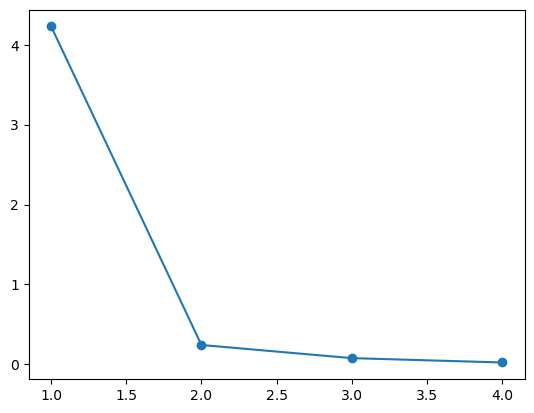

In [ ]:
plt.plot(range(1,5),pca.explained_variance_, "-o") # 각 축(주성분)마다의 분산.
plt.show() # 분산이 내려가기만 한다. elbow point
#! 첫 번째 주성분만 있어도 데이터를 거의 다 설명한다.

## 2. Covariance Matrix -> Eigen Decomposition

C = Q*lambda*Q.T -> eigen decomopsition\
Q : (n,n) Orthgonal Matrix\
lambda : (n,n) Diagonal Matrix\
단, C가 정사각행렬.

In [59]:
import numpy as np
from numpy import linalg
Y = np.array([(0, 0), (1, 1), (2, 0), (2, 1), (3, 2), (4, 2)])
Y = Y - Y.mean(axis = 0) # 평균을 0으로 맞춰줌
n = Y.shape[0] # data 개수(==len(X))

U, S, VT = linalg.svd(Y) # 고유값 분해

C = (Y.T @ Y) / n # 가정 : 공분산 = 0 
C*6

array([[10.,  5.],
       [ 5.,  4.]])

In [60]:
C = np.array([(5,3),(3,4)])
L, Q = linalg.eigh(C)  # eigen decomposition
# Lambda, Q
print(L) # == pca.explained_variance_ 즉, 분산이다~

[1.45861873 7.54138127]


In [ ]:
from numpy import linalg

Y = iris.data
Y = Y - Y.mean(axis = 0) # 평균을 0으로 맞춰줌
n = Y.shape[0] # data 개수(==len(X))

U, S, VT = linalg.svd(Y) # 고유값 분해

C = (Y.T @ Y) / n # 가정 : 공분산 = 0 
# covariance matrix
C
# 0번째 축과 1번째 축의 관련이 별로 없군. <- '-0.04215'(공분산)

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

In [ ]:
L, Q = linalg.eigh(C)  # eigen decomposition
# Lambda, Q
print(L) # == pca.explained_variance_ 즉, 분산이다~

[0.02367619 0.0776881  0.24105294 4.20005343]


In [ ]:
print(Q) # 3번째 주성분 ~ 0번째 주성분

[[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


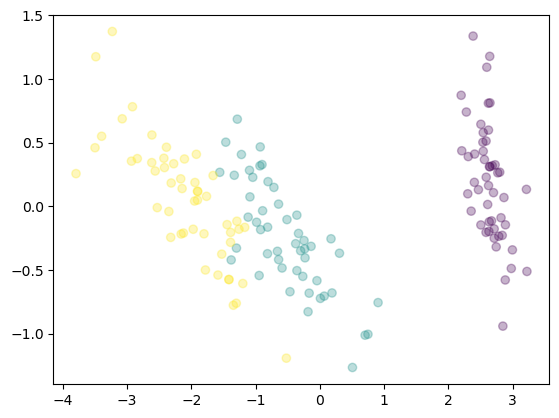

In [30]:
Z = Y @ Q # = pca.fit_transform의 결과
plt.scatter(Z[:,3], Z[:,2], c = iris['target'], alpha=0.3)

## 3. SVD

U : (m,m) Orthogonal Matrix\
Sigma : (m,n) Diagonal Matrix\
V : (n,n) Orthogonal Matirx\


In [ ]:
from numpy import linalg

X = iris.data
X = X - X.mean(axis = 0) # 세로방향의 평균

U, S, VT = linalg.svd(X) # X는 각 컬럼이 0인 data

Y = X@VT.T # 우리가 원하는건 V라서 transpose
# Y는 PCA의 결과임.

In [34]:
print(VT.T)

[[ 0.36138659 -0.65658877  0.58202985  0.31548719]
 [-0.08452251 -0.73016143 -0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266 -0.07623608 -0.47983899]
 [ 0.3582892   0.07548102 -0.54583143  0.75365743]]


In [35]:
print(S)

[25.09996044  6.01314738  3.41368064  1.88452351]


In [ ]:
print((S**2)/len(X)) # 분산

[4.20005343 0.24105294 0.0776881  0.02367619]


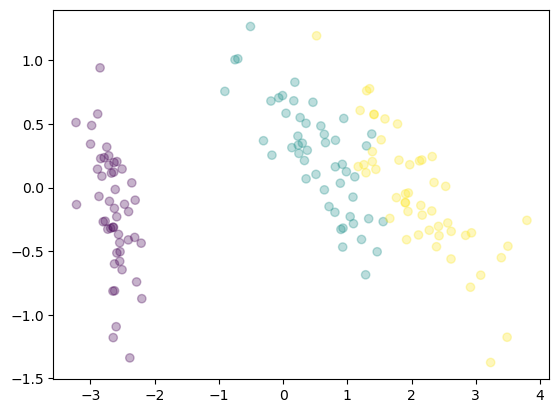

In [37]:
# 0번째 주성분이 가장 큰 주성분
plt.scatter(Y[:,0], Y[:,1], c = iris.target, alpha=0.3)
plt.show() # 위아래 flip된 상황

## 4. power method

In [48]:
import numpy as np
from numpy.linalg import norm

X = iris['data']
X = X - X.mean(axis =0)

C = (X.T@X)/len(X)

M = C.copy()

v = np.random.randn(4,1)
v = v/norm(v)

vp = M @ v
lmb = norm(vp)
print(vp, lmb)


[[ 0.96356011]
 [-0.18673994]
 [ 2.286435  ]
 [ 0.98999981]] 2.677910475077843


In [49]:
lmb = norm(vp)
vp = vp/lmb
v = vp
print(v, lmb)

[[ 0.3598179 ]
 [-0.06973345]
 [ 0.85381308]
 [ 0.36969115]] 2.677910475077843


In [50]:
vp = M @ v
lmb = norm(vp)
vp = vp/lmb
v = vp
print(v, lmb)

[[ 0.36157965]
 [-0.08396258]
 [ 0.85658627]
 [ 0.35842769]] 4.199299580975729


In [51]:
vp = M @ v
lmb = norm(vp)
vp = vp/lmb
v = vp
print(v, lmb) # largest eigen vector/value

[[ 0.36140384]
 [-0.08449672]
 [ 0.85666557]
 [ 0.35828992]] 4.200052638166052


In [ ]:
#M = M - lmb(v@v.T) # 0번째 주성분을 제거한 행렬

In [56]:
X = iris['data']
X = X - X.mean(axis = 0)

C = (X.T@X)/len(X)
M = C.copy()

L = []
Q = []

for _ in range(4):
    v = np.random.randn(4,1)
    v = v/np.linalg.norm(v)
    
    for _ in range(20):
        vp = M @ v
        vp_norm = vp/np.linalg.norm(vp) # 정보 : norm(vp)는 길이다. == 고유값
        v = vp_norm
    L.append(np.linalg.norm(vp))
    Q.append(v)
    M = M - np.linalg.norm(vp)*v@v.T

L = np.array(L)
Q = np.hstack(Q)

print(L)
print(Q)

[4.20005343 0.24105294 0.0776881  0.02367619]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


## 좌표변환

In [38]:
import numpy as np

Y = np.array([[1,2,3],
                [9,5,6],
                [8,8,9],
                [2,2,4]])
k = Y.copy()
Y = Y - Y.mean(axis = 0)
Y

array([[-4.  , -2.25, -2.5 ],
       [ 4.  ,  0.75,  0.5 ],
       [ 3.  ,  3.75,  3.5 ],
       [-3.  , -2.25, -1.5 ]])

In [39]:
M = (Y.T@Y)/len(Y)
L, Q = np.linalg.eigh(M)
L,Q

(array([ 0.07063669,  1.82934004, 22.03752327]),
 array([[ 0.03251037, -0.68615925, -0.72672454],
        [-0.6978409 ,  0.50494878, -0.50798111],
        [ 0.7155146 ,  0.52365277, -0.46241392]]))

In [40]:
new = np.array([1,2,3])
new@Q

array([ 0.78337237,  1.89469661, -3.12992851])

In [41]:
Y@Q # 다른 이유는 0으로 초기화 안해줘서.

array([[-0.34868596,  0.29937032,  5.20589046],
       [-0.03558189, -2.10409902, -3.51909097],
       [-0.01507117,  1.66786486, -5.7035515 ],
       [ 0.39933902,  0.13686384,  4.016752  ]])

In [42]:
new_ = new - k.mean(axis = 0) # 초기화 해줌
new_@Q

array([-0.34868596,  0.29937032,  5.20589046])

## SVD 결과 해석

In [44]:
Y = np.array([[1,2,3],
                [9,5,6],
                [8,8,9],
                [2,2,4]])
Y = Y - Y.mean(axis = 0) # 평균을 0으로 맞춰줌

U, S, VT = np.linalg.svd(Y) # 고유값 분해

In [50]:
Y@VT.T # 순서만 바뀜 결과 같음

array([[-5.20589046, -0.29937032, -0.34868596],
       [ 3.51909097,  2.10409902, -0.03558189],
       [ 5.7035515 , -1.66786486, -0.01507117],
       [-4.016752  , -0.13686384,  0.39933902]])

In [51]:
print((S**2)/len(Y)) # 분산

[22.03752327  1.82934004  0.07063669]


In [ ]:
L # 분산, 고유값

array([ 0.07063669,  1.82934004, 22.03752327])